# Exploring the development of mosquitoes in different habitats over time and investigate factors influencing their growth and survival

In [24]:
from subprocess import check_output
print(check_output(["ls", "./"]).decode("utf8"))

import warnings
warnings.filterwarnings('ignore')

%config Completer.use_jedi = False
%load_ext watermark
%watermark --iversions

Development_stage_larvae.xlsx
HBNUresults_Dodowa_results_2.xlsx
data_analysis.ipynb

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
matplotlib: 3.7.4
pandas    : 1.5.3
seaborn   : 0.12.2



In [3]:
pwd

'/home/laklevi1/anarh/Aforson'

In [5]:
file_path = '/home/laklevi1/anarh/Aforson/Development_stage_larvae.xlsx'

import pandas as pd

# # Replace 'path/to/your/spreadsheet.xlsx' with the actual path to your spreadsheet
# data = pd.read_excel(f'{file_path}')
# data
xl = pd.ExcelFile(f'{file_path}')
xl.sheet_names

['DODOWA - COMBINE', 'Dodowa_2024', 'TESHIE COMBINE', 'Teshie_2024']

In [6]:
df = xl.parse(sheet_name='Dodowa_2024')
df.head()

,Habitat no.,Replicate,Day,Date,No. of Eggs,No. Hatched,I,II,III,IV,Pupae,Males,Females,Total
0,Control(Distilled Water),REP 1,0,2023-12-28,0,0,0,0,0,0,0,0,0,0
1,Control(Distilled Water),REP 1,1,2023-12-29,0,0,0,0,0,0,0,0,0,0
2,Control(Distilled Water),REP 1,2,2023-12-30,0,0,0,0,0,0,0,0,0,0
3,Control(Distilled Water),REP 1,3,2023-12-31,0,0,0,0,0,0,0,0,0,0
4,Control(Distilled Water),REP 1,4,2024-01-01,0,0,0,0,0,0,0,0,0,0


In [7]:
df.columns

Index(['Habitat no.', 'Replicate', 'Day', 'Date', 'No. of Eggs ',
       'No. Hatched', 'I', 'II', 'III', 'IV', 'Pupae', 'Males', 'Females',
       'Total'],
      dtype='object')

### Basic descriptive statistics

In [17]:
summary_stats = df.describe()
summary_stats

,Day,No. of Eggs,No. Hatched,I,II,III,IV,Pupae,Males,Females,Total
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.0,45.0,45.0,45.000000,45.0
mean,4.000000,18.644444,9.177778,41.466667,6.600000,0.755556,0.0,0.0,0.0,0.222222,0.0
std,2.611165,47.587315,38.511090,147.935275,20.132967,3.451979,0.0,0.0,0.0,1.490712,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
75%,6.000000,8.000000,0.000000,4.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
max,8.000000,220.000000,250.000000,870.000000,100.000000,21.000000,0.0,0.0,0.0,10.000000,0.0



The dataset comprises 45 observations, each representing a specific instance in the study of mosquito development. The variable 'No. of Eggs' exhibits a wide range, with a mean of 18.64 eggs and a notable standard deviation of 47.59 eggs. The distribution is positively skewed, as indicated by the 75th percentile (Q3) value of 8 eggs and a maximum value of 220 eggs.

In the case of 'No. Hatched,' the mean is 9.18, with a standard deviation of 38.51. Similar to 'No. of Eggs,' this variable shows variability, as evidenced by a maximum value of 250 hatched individuals. However, the majority of observations have a value of 0, as indicated by the 25th and 50th percentiles.

The variable 'I' represents the count of individuals at developmental stage I. With a mean of 42.41 and a large standard deviation of 149.51, this variable demonstrates substantial variability. The 75th percentile indicates that 75% of the observations have a count of 4.25 or lower, while the maximum value reaches 870 individuals.

'Developmental Stage II (II)' displays a mean of 6.60 individuals, with a standard deviation of 20.13. The distribution is positively skewed, with most observations concentrated at lower counts. The maximum value of 100 suggests some instances of higher counts.

'Developmental Stage III (III)' has a mean of 0.76 individuals and a standard deviation of 3.45. The majority of observations have a count of 0, as indicated by the 25th, 50th, and 75th percentiles. The maximum count reaches 21, suggesting a small number of instances with higher counts.

'Developmental Stage IV (IV),' 'Pupae,' 'Males,' and 'Total' exhibit constant values of 0 for all observations, indicating no variability in these variables.

Lastly, the variable 'Females' demonstrates a mean of 0.22 individuals, with a standard deviation of 1.49. The distribution is positively skewed, and the maximum count is 10, suggesting some instances with higher counts of female mosquitoes.



#### Bivariate analysis

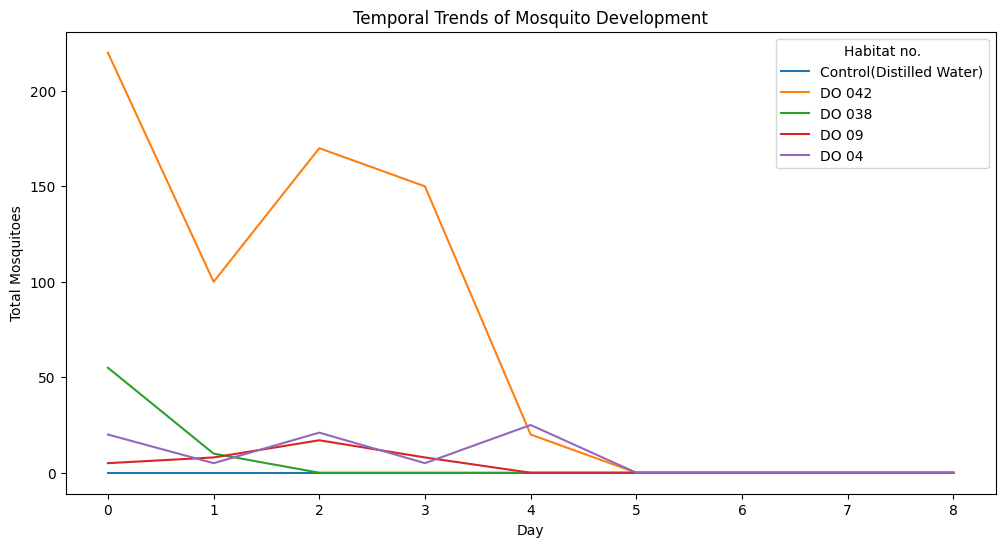

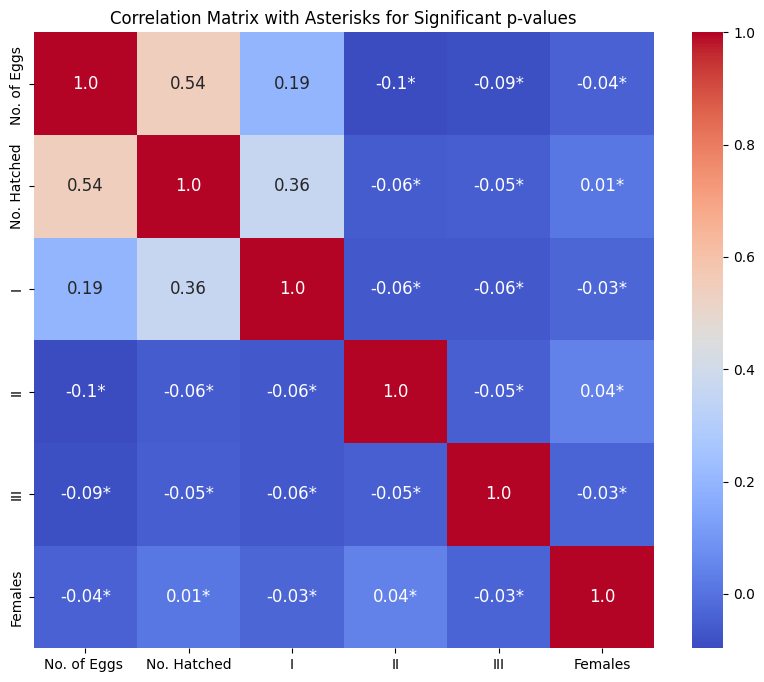

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'


# Temporal trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='Day', y='No. of Eggs ', hue='Habitat no.', data=df)
plt.title('Temporal Trends of Mosquito Development')
plt.xlabel('Day')
plt.ylabel('Total Mosquitoes')
plt.show()

# # Correlation matrix
# corr_matrix = df.corr()
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()

# # Drop columns IV, Pupae, Day, Total
# columns_to_drop = ['IV', 'Pupae', 'Males', 'Day', 'Total']
# df_subset = df.drop(columns=columns_to_drop)

# # Correlation matrix
# corr_matrix = df_subset.corr()

# # Plot heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Matrix')
# plt.show()

# Drop non-numeric columns
df_numeric = df.select_dtypes(include='number')

# Drop columns IV, Pupae, Day, Total
columns_to_drop = ['IV', 'Pupae', 'Males', 'Day', 'Total']
df_subset = df_numeric.drop(columns=columns_to_drop)

# Correlation matrix
corr_matrix = df_subset.corr()


# Calculate p-values for correlation
p_values = df_subset.apply(lambda x: df_subset.corrwith(x).apply(lambda y: '*' if y < 0.05 else ''))

# Plot heatmap with asterisks for significant p-values
plt.figure(figsize=(10, 8))
annot_values = corr_matrix.round(2).astype(str) + p_values
sns.heatmap(corr_matrix, annot=annot_values, cmap='coolwarm', fmt="", annot_kws={"size": 12})
plt.title('Correlation Matrix with Asterisks for Significant p-values')
plt.show()

The correlation matrix offers valuable insights into the relationships among key variables in the dataset, shedding light on the dynamics of mosquito development.

Firstly, the variable 'No. of Eggs' exhibits a moderate positive correlation (0.54) with 'No. Hatched,' implying that an increase in the number of eggs is associated with a higher count of hatched individuals. Additionally, a weak positive correlation (0.20) is observed with 'I' (individuals at developmental stage I), suggesting a modest relationship. However, weak negative correlations with 'II' and 'III' indicate a slight tendency for fewer eggs to be associated with a higher count of individuals at these developmental stages. Furthermore, there is a very weak negative correlation (-0.04) with 'Females,' suggesting a minimal association with the count of female mosquitoes.

Moving on to 'No. Hatched,' this variable demonstrates a strong positive correlation (0.54) with 'No. of Eggs,' confirming the intuitive relationship that more eggs result in more hatched individuals. A moderate positive correlation (0.36) with 'I' indicates a moderate positive association, while weak negative correlations with 'II' and 'III' suggest a slight tendency for fewer hatched individuals with higher counts at these developmental stages. A very weak positive correlation (0.01) with 'Females' suggests minimal association with the count of female mosquitoes.

The variable 'I,' representing individuals at developmental stage I, displays a weak positive correlation (0.20) with 'No. of Eggs' and a moderate positive correlation (0.36) with 'No. Hatched,' indicating a modest positive relationship with both variables. Weak negative correlations with 'II' and 'III' suggest minimal associations with the counts at these developmental stages. A very weak negative correlation (-0.03) with 'Females' suggests a minimal negative association with the count of female mosquitoes.

Concerning 'II,' representing developmental stage II, there are very weak negative correlations with 'No. of Eggs' (-0.10) and 'No. Hatched' (-0.06), indicating minimal associations. Similarly, 'II' shows very weak correlations with 'I,' 'III,' and 'Females,' suggesting minimal relationships with counts at other developmental stages and female mosquitoes.

For 'III,' representing developmental stage III, there are very weak negative correlations with 'No. of Eggs' (-0.09), 'No. Hatched' (-0.05), 'I,' and 'Females,' suggesting minimal associations.

Lastly, the variable 'Females' exhibits very weak negative correlations with 'No. of Eggs' (-0.04), 'I,' and 'III.' It also shows a very weak positive correlation (0.01) with 'No. Hatched' and a very weak positive correlation (0.04) with 'II,' indicating minimal associations.



 The asterisks in the plot indicate the statistical significance of the correlation coefficients.

Here's a breakdown of the interpretation:

* **Coefficient with Asterisk (e.g., $-0.1^\ast$):** This signifies a statistically significant correlation between the two variables. In the context of your image, the asterisk next to a coefficient (like -0.1*) suggests a statistically significant correlation between the two variables represented by that row and column in the correlation matrix. For example, there might be a significant negative correlation between the number of eggs and the number of pupae (coefficient -0.1*). This could indicate that as the number of eggs increases, the number of pupae (developed stage) tends to decrease, possibly due to factors like limited resources or competition within the breeding site.

* **Coefficient with No Asterisk (e.g., -0.09):** This indicates a non-statistically significant correlation. The absence of an asterisk next to a coefficient (like -0.09) suggests that the correlation between the two variables is not statistically strong enough to reject the null hypothesis of no correlation. In other words, the observed correlation could be due to random chance. For instance, the coefficient -0.09 between the number of hatched larvae and the number of females might not be statistically significant, meaning there's weak evidence to conclude a relationship between these variables.

In summary, the correlation matrix indicates mostly weak to very weak relationships between variables, with the most notable positive correlation observed between 'No. of Eggs' and 'No. Hatched.'

### **plot separate Kaplan-Meier curves for each developmental stage 'I,' 'II,' and 'III':**

In [21]:
 # Uncheck and Run this for the first time
!pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.7/350.7 kB 1.0 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 13.1 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=c4073ac27506eebfa4e23c149b44c4f8f723d5bb36da506d515c78b53493722f
  Stored in directory: /home/laklevi1/.cache/pip/wheels/16/a2/b6/582cfdfbeeccd469504a01af3bb952fd9e7eccba40995eafea
Successfully built autograd-gamma


In [22]:
# Create an 'Event' column based on the summation of emerging adults
df['Event'] = ((df['Pupae'] + df['Males'] + df['Females']) > 0).astype(int)

# Check the updated DataFrame
df.head()

,Habitat no.,Replicate,Day,Date,No. of Eggs,No. Hatched,I,II,III,IV,Pupae,Males,Females,Total,Event
0,Control(Distilled Water),REP 1,0,2023-12-28,0,0,0,0,0,0,0,0,0,0,0
1,Control(Distilled Water),REP 1,1,2023-12-29,0,0,0,0,0,0,0,0,0,0,0
2,Control(Distilled Water),REP 1,2,2023-12-30,0,0,0,0,0,0,0,0,0,0,0
3,Control(Distilled Water),REP 1,3,2023-12-31,0,0,0,0,0,0,0,0,0,0,0
4,Control(Distilled Water),REP 1,4,2024-01-01,0,0,0,0,0,0,0,0,0,0,0


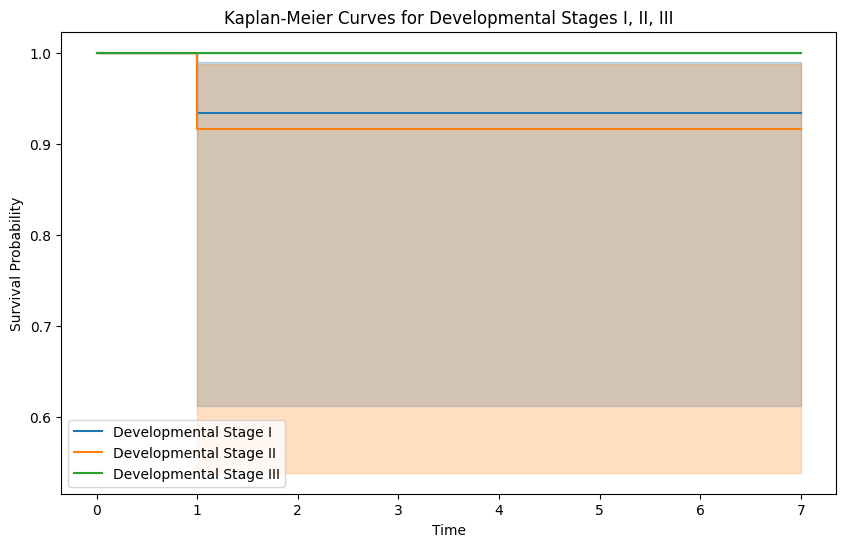

In [23]:
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Developmental stages 'I' through 'III'
developmental_stages = ['I', 'II', 'III']
event_column = 'Event'
time_column = 'Day'

# Create a Kaplan-Meier estimator
kmf = KaplanMeierFitter()

# Plot separate Kaplan-Meier curves for each developmental stage
plt.figure(figsize=(10, 6))

for stage in developmental_stages:
    # Filter rows where the specific developmental stage is reached
    df_stage = df[df[stage] > 0]

    # Check if the DataFrame is not empty and the 'Event' column exists
    if not df_stage.empty and event_column in df_stage.columns:
        # Fit the model
        kmf.fit(durations=df_stage[time_column], event_observed=df_stage[event_column])

        # Plot the Kaplan-Meier curve for the current stage
        kmf.plot_survival_function(label=f'Developmental Stage {stage}')

plt.title(f'Kaplan-Meier Curves for Developmental Stages {", ".join(developmental_stages)}')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend()
plt.show()


Based on the result above which shows separate Kaplan-Meier curves for each developmental stage (I, II, and III) of mosquito larvae, here's a discussion of the results:

**Observations:**

* All three curves (Stages I, II, and III) start at 1.0 on the y-axis, indicating a 100% survival probability at the beginning of the observation period (day 0).
* The survival probability (y-axis) decreases over time (x-axis) for all three stages, which is expected as some larvae die naturally.
* The **steepest decline** in survival probability is observed in **Stage I**. This suggests that Stage I larvae have the **highest mortality rate**.
* The **survival probability for Stage II** appears to be **higher** than Stage I, indicated by a shallower slope of its curve. This suggests that Stage II larvae are more likely to survive each day compared to Stage I.
* The curve for **Stage III** seems to have an **intermediate slope** between Stages I and II. This indicates a **moderate mortality rate** for Stage III larvae.


**Interpretation with Environmental Considerations:**

The Kaplan-Meier curves reveal critical information about the survival of mosquito larvae across different developmental stages. By observing the slopes of the curves and comparing them across stages (I, II, and III), we can gain insights into the relative vulnerability of each stage:

* **Stage I Vulnerability:** The steepest decline in survival probability suggests that Stage I larvae are the most susceptible to mortality. Factors contributing to this vulnerability might include:
    * **Weak Immune System:** Newly hatched larvae have a less developed immune system, making them more susceptible to diseases.
    * **Molting Stress:** The molting process from Stage I to Stage II can be physically demanding and stressful for the larvae.
    * **Environmental Factors:**
        * High larval density can lead to increased competition for resources and potentially create favourable conditions for pathogens.
        * Lack of vegetation cover might expose larvae to predators or harsh environmental conditions like extreme sunlight or temperature fluctuations.
        * Physicochemical parameters like unsuitable pH, salinity, TDS, or extreme water temperature can also stress or kill the larvae.

* **Increased Resilience in Later Stages:** The shallower slopes of the curves for Stages II and III indicate higher survival probabilities compared to Stage I. This suggests that larvae become more resilient as they develop, potentially due to:
    * Stronger bodies and developing immune systems.
    * Improved ability to tolerate environmental variations.


# Now Analysis on HBNU results

In [25]:
hbnufile_path = '/home/laklevi1/anarh/Aforson/HBNUresults_Dodowa_results_2.xlsx'

In [26]:
xl = pd.ExcelFile(f'{hbnufile_path }')
xl.sheet_names

['results']

In [27]:
hbf = xl.parse(sheet_name='results')
hbf.head()

,Week,Site,Socioeconomic_status,Habitat No,Season,Habitat Type,Vegetative Cover_%,Landuse_types,No. of Dips,Perimeter (m),...,EC_uS,Salinity_ppt,TDS_ppm,Lat,Latitude,Long,Longitude,Elevation (m),Remarks,Productivity type
0,week 1,Dodowa,Lower socioeconomic sites,DD003,Wet,Puddle,0.0,Road,14,20.16,...,480.0,0.24,340.0,54.991,5.916517,3.817,0.063617,52.0,0,Uproductive
1,week 1,Dodowa,Lower socioeconomic sites,DD004,Wet,Puddle,0.0,Road,15,7.84,...,515.0,0.26,368.0,54.985,5.916417,3.821,0.063683,54.0,0,Uproductive
2,week 1,Dodowa,Lower socioeconomic sites,DD005,Wet,Swamp,72.0,Road,18,34.77,...,320.0,0.16,227.0,53.992,5.899867,3.811,0.063517,54.0,0,Uproductive
3,week 1,Dodowa,Lower socioeconomic sites,DD006,Wet,Swamp,68.0,Road,14,28.08,...,195.5,0.1,139.0,53.999,5.899983,3.800,0.063333,55.0,0,Uproductive
4,week 1,Dodowa,Lower socioeconomic sites,DD010,Wet,Puddle,13.0,Road,14,26.66,...,233.0,0.16,166.0,54.040,5.900667,3.727,0.062117,51.0,0,Uproductive


* Select numrical values

In [28]:
hbf_numeric = hbf.select_dtypes(include='number')
hbf_numeric.head()

,Vegetative Cover_%,No. of Dips,Perimeter (m),Depth (cm),Length,Width,L1-L2,L3-L4,Pupa,Total,...,Distance nearest to human settlement,pH,Temp_C,EC_uS,TDS_ppm,Lat,Latitude,Long,Longitude,Elevation (m)
0,0.0,14,20.16,6.0,4.8,4.2,0,0,0,0,...,15,8.42,28.5,480.0,340.0,54.991,5.916517,3.817,0.063617,52.0
1,0.0,15,7.84,10.0,5.6,1.4,0,0,0,0,...,5,8.29,28.7,515.0,368.0,54.985,5.916417,3.821,0.063683,54.0
2,72.0,18,34.77,35.0,6.1,5.7,0,0,0,0,...,6,7.62,28.4,320.0,227.0,53.992,5.899867,3.811,0.063517,54.0
3,68.0,14,28.08,28.0,5.4,5.2,2,1,0,3,...,9,7.59,28.9,195.5,139.0,53.999,5.899983,3.800,0.063333,55.0
4,13.0,14,26.66,27.0,6.2,4.3,0,0,0,0,...,11,7.60,27.3,233.0,166.0,54.040,5.900667,3.727,0.062117,51.0


In [29]:
hbf_numeric.columns

Index(['Vegetative Cover_%', 'No. of Dips', 'Perimeter (m)', 'Depth (cm)',
       'Length', 'Width', 'L1-L2', 'L3-L4', 'Pupa', 'Total', 'Larval Density',
       'Culex', 'Distance nearest to human settlement', 'pH', 'Temp_C',
       'EC_uS', 'TDS_ppm', 'Lat', 'Latitude ', 'Long', 'Longitude',
       'Elevation (m)'],
      dtype='object')

In [31]:
columns_to_drop = ['Elevation (m)', 'Long', 'Longitude', 'Latitude ', 'Total', 'Lat',  'L1-L2', 'L3-L4', 'Pupa']
df_drop = hbf_numeric.drop(columns=columns_to_drop)
df_drop.head()

,Vegetative Cover_%,No. of Dips,Perimeter (m),Depth (cm),Length,Width,Larval Density,Culex,Distance nearest to human settlement,pH,Temp_C,EC_uS,TDS_ppm
0,0.0,14,20.16,6.0,4.8,4.2,0.000000,0,15,8.42,28.5,480.0,340.0
1,0.0,15,7.84,10.0,5.6,1.4,0.000000,0,5,8.29,28.7,515.0,368.0
2,72.0,18,34.77,35.0,6.1,5.7,0.000000,0,6,7.62,28.4,320.0,227.0
3,68.0,14,28.08,28.0,5.4,5.2,0.214286,0,9,7.59,28.9,195.5,139.0
4,13.0,14,26.66,27.0,6.2,4.3,0.000000,0,11,7.60,27.3,233.0,166.0


Here's a breakdown of the step-by-step process for feature importance in Random Forest:

**1. Training Data:**

* The training data is the collection of samples used to build the random forest model. Each sample represents an observation or instance, and it consists of a set of features (variables) and a target variable (what you're trying to predict). In the image, this is represented by the block labelled "(a) training data".

**2. Bootstrap Samples (with Replacement):**

* Random Forest creates multiple decision trees, each trained on a different subset of the training data. This process is called bagging (or bootstrap aggregating).
* To create these subsets, the algorithm samples **with replacement** from the original training data. This means a data point can be chosen multiple times for a single tree, while other data points might be left out. This injects randomness into the model and helps reduce overfitting.
* The image shows this step as "k bootstrap samples," where "k" represents the number of trees you decide to create in the forest. Each sample (sample 1, sample 2, ..., sample k) represents a subset of the training data.

**3. Build Decision Trees:**

* A decision tree is a flowchart-like structure that predicts the target variable based on a series of yes/no questions about the features.
* Each bootstrap sample is used to build a separate decision tree. The tree keeps splitting the data into branches based on the most informative features until it reaches a stopping criterion (e.g., maximum depth or minimum number of samples per leaf).
* In the image, this step is depicted by "k trees."

**4. Feature Importance:**

* Random Forest doesn't rely on a single decision tree for prediction. Instead, it uses an ensemble approach where all the trees in the forest contribute to the final prediction.
* To assess the importance of each feature, Random Forest calculates a score for each feature based on how much it contributes to splitting the data at each node in the trees. Here's how this works:
    * When a feature is used to split the data at a node in a decision tree, it reduces the **impurity** (or heterogeneity) of the data reaching the child nodes. Impurity can be measured using different metrics like Gini index for classification or variance for regression.
    * The importance score for a feature is typically calculated as the average decrease in impurity across all the trees in the forest, where the feature was used for splitting. In other words, it measures how much a feature on average helped in making purer splits throughout all the trees.

**5. Relative Importance:**

* The feature importance scores from all the trees are usually averaged to get a final importance score for each feature. These scores are then normalized by dividing by the maximum score (or sometimes the sum of all scores) to get relative importance values between 0 and 1 (or 0% and 100%).
* This relative importance indicates how important a feature is compared to other features in the model. Features with higher relative importance scores contribute more to the prediction accuracy of the random forest model.
* The image depicts this step by "average of single trees predictions" leading to "random forest prediction." The final prediction is based on the combined output of all the trees, which implicitly incorporates the feature importance learned during tree building.

**6. Interpretation:**

* By analyzing the relative importance scores, you can gain insights into which features are most influential in predicting the target variable. This can help you:
    * Identify the most relevant features for your problem.
    * Improve the model by potentially removing unimportant features (if applicable).
    * Understand the underlying relationships between features and the target variable.

**In essence, Random Forest leverages the power of multiple decision trees and feature importance scores to provide valuable insights into which features are most critical for making accurate predictions.**



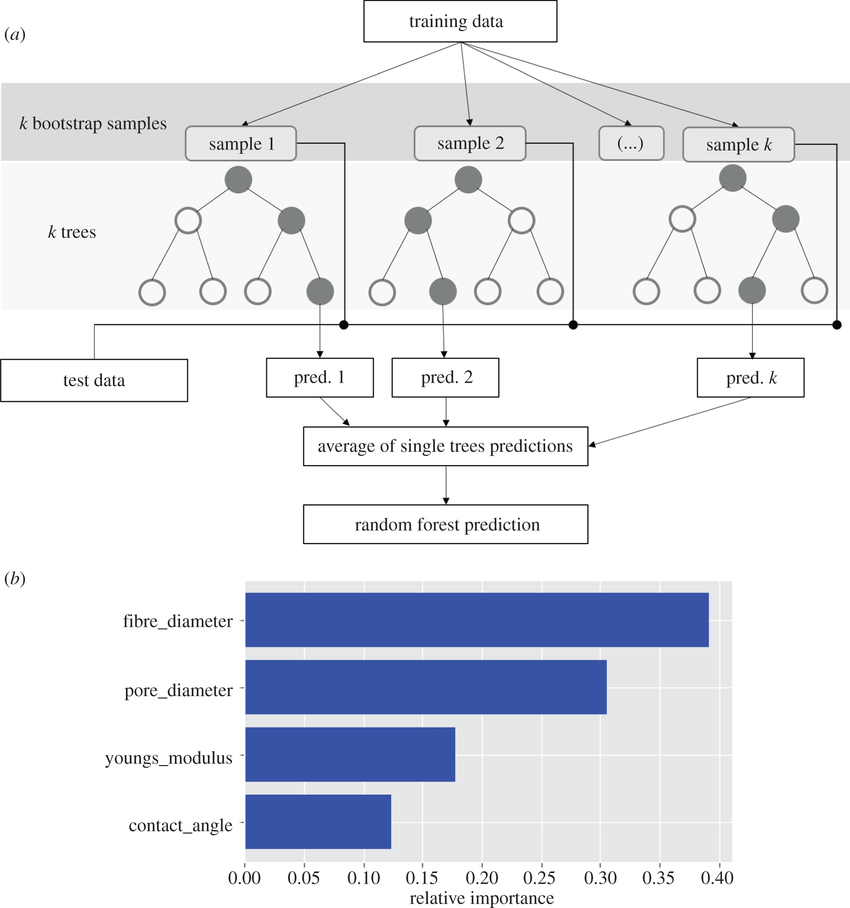

In [32]:
from IPython.display import Image

# Replace 'your_image.png' with the path to your PNG image file
image_path = 'a-Simplified-structure-of-random-forest-regression-algorithm-b-Feature-importance.png'

# Display the image
Image(filename=image_path)

First, ensure you have the necessary libraries installed:

!pip install yellowbrick scikit-learn

In [34]:
# !pip install yellowbrick

Using cached yellowbrick-1.5-py3-none-any.whl (282 kB)


* Fill in missing values

In [38]:
df_drop.isnull().sum()

Vegetative Cover_%                      6
No. of Dips                             0
Perimeter (m)                           0
Depth (cm)                              0
Length                                  0
Width                                   1
Larval Density                          0
Culex                                   0
Distance nearest to human settlement    0
pH                                      0
Temp_C                                  0
EC_uS                                   0
TDS_ppm                                 0
dtype: int64

In [40]:
# Interpolate missing values in the 'Value' column
df_drop['Vegetative Cover_%'] = df_drop['Vegetative Cover_%'].interpolate()
df_drop['Width'] = df_drop['Width'].interpolate()
df_drop.isnull().sum()

Vegetative Cover_%                      0
No. of Dips                             0
Perimeter (m)                           0
Depth (cm)                              0
Length                                  0
Width                                   0
Larval Density                          0
Culex                                   0
Distance nearest to human settlement    0
pH                                      0
Temp_C                                  0
EC_uS                                   0
TDS_ppm                                 0
dtype: int64

In [43]:
import matplotlib.font_manager

# List available fonts
available_fonts = [f.name for f in matplotlib.font_manager.fontManager.ttflist]
print(available_fonts)

['DejaVu Sans', 'STIXNonUnicode', 'STIXSizeOneSym', 'DejaVu Serif', 'DejaVu Sans Mono', 'DejaVu Sans', 'DejaVu Serif', 'DejaVu Sans Mono', 'cmex10', 'STIXGeneral', 'STIXSizeTwoSym', 'cmtt10', 'STIXNonUnicode', 'cmss10', 'STIXNonUnicode', 'cmr10', 'DejaVu Sans Mono', 'STIXGeneral', 'STIXSizeThreeSym', 'DejaVu Sans', 'STIXSizeThreeSym', 'STIXSizeFourSym', 'DejaVu Sans Display', 'STIXGeneral', 'STIXSizeFiveSym', 'DejaVu Serif', 'cmsy10', 'STIXSizeTwoSym', 'STIXNonUnicode', 'cmmi10', 'DejaVu Serif', 'DejaVu Serif Display', 'STIXSizeOneSym', 'DejaVu Sans Mono', 'cmb10', 'STIXGeneral', 'STIXSizeFourSym', 'DejaVu Sans', 'DejaVu Sans Mono', 'DejaVu Sans', 'DejaVu Sans Mono', 'DejaVu Serif', 'DejaVu Serif', 'DejaVu Sans']


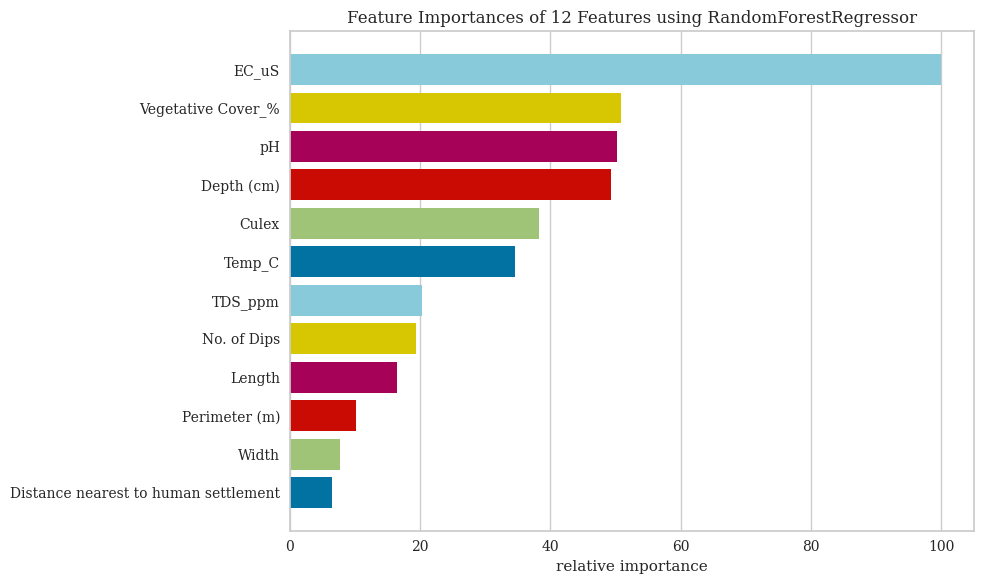

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor as rfR
from yellowbrick.model_selection import FeatureImportances
plt.rcParams['font.family'] = 'DejaVu Serif'

# Generate some example data (replace with your dataset)
np.random.seed(42)
X = df_drop.drop(columns='Larval Density')
y = df_drop['Larval Density']

# Create a Random Forest model
model = rfR(n_estimators=100, random_state=42)

# Fit the model
model.fit(X, y)

# Visualize feature importances
fig, ax = plt.subplots(figsize=(10, 6))
viz = FeatureImportances(model, ax=ax)
viz.fit(X, y)
viz.show()

plt.show()


In [50]:
#!/usr/bin/env python3
'''
T. A-N authored this Python script
'''
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, probplot
# from sklearn.preprocessing import QuantileTransformer


class NormalityChecker:
    def __init__(self, df):
        self.df = df

    def _plot_distribution(self, ax, data, title):        

        sns.distplot(data,
                     fit=norm,
                     hist_kws=dict(edgecolor="black",
                                   linewidth=2,
                                   color='blue'),
                     kde_kws={'linestyle': '--',
                              'linewidth': 2,
                              "color": "darkgreen",
                              "label": "KDE"},
                     ax=ax)
        ax.grid(True, linestyle='--')

        (mu, sigma) = norm.fit(data)
        ax.legend(['Normal dist. ($\mu=$ {:.2f}; $\sigma=$ {:.2f})'.format(mu, sigma)],
                  loc='best')
        ax.set_title(title)

    def _qq_plot(self, ax, data):        

        probplot(data, plot=ax, rvalue=True)
        ax.grid(True, linestyle='--')

    def check_normality(self, cname):
        fig, ((ax1, ax2)) = plt.subplots(1, 2,
                                        figsize=(12, 6),
                                        dpi=80)

        self._plot_distribution(ax1, self.df[cname], '{} distribution'.format(cname))
        self._qq_plot(ax2, self.df[cname])        

        fig.tight_layout()


class LogTransformChecker:
    def __init__(self, df):
        self.df = df

    def _plot_distribution(self, ax, data, title, log_transform=False):
        if log_transform:
            data = np.log1p(data)

        sns.distplot(data,
                     fit=norm,
                     hist_kws=dict(edgecolor="black",
                                   linewidth=2,
                                   color='blue'),
                     kde_kws={'linestyle': '--',
                              'linewidth': 2,
                              "color": "darkgreen",
                              "label": "KDE"},
                     ax=ax)
        ax.grid(True, linestyle='--')

        (mu, sigma) = norm.fit(data)
        ax.legend(['Normal dist. ($\mu=$ {:.2f}; $\sigma=$ {:.2f})'.format(mu, sigma)],
                  loc='best')
        ax.set_title(title)

    def _qq_plot(self, ax, data, log_transform=False):
        if log_transform:
            data = np.log1p(data)

        probplot(data, plot=ax, rvalue=True)
        ax.grid(True, linestyle='--')

    def check_normality(self, cname, return_log_transform=True):
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,
                                                    figsize=(12, 12),
                                                    dpi=80)

        self._plot_distribution(ax1, self.df[cname], '{} distribution'.format(cname))
        self._qq_plot(ax2, self.df[cname])

        if return_log_transform:
            self.df[cname] = np.log1p(self.df[cname])
            self._plot_distribution(ax3, self.df[cname], '{} distribution in log scale'.format(cname), log_transform=True)
            self._qq_plot(ax4, self.df[cname], log_transform=True)

        fig.tight_layout()

        if return_log_transform:
            return self.df[cname]



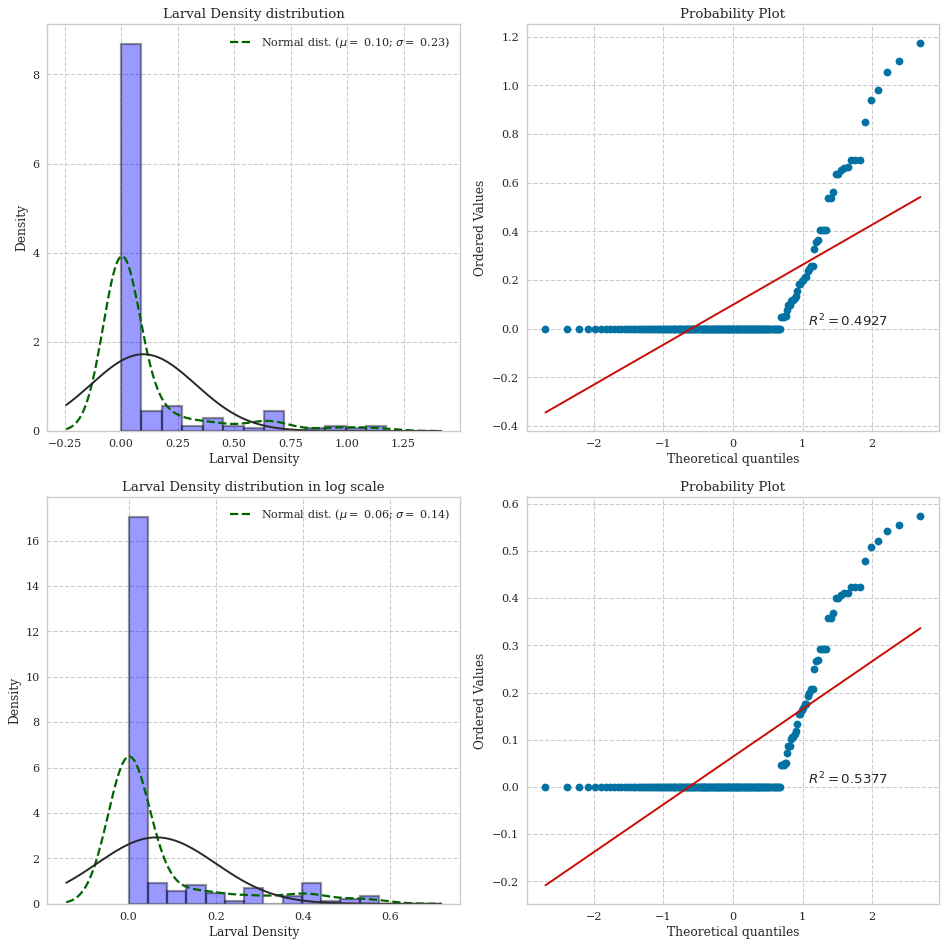

In [52]:
normality_checker = LogTransformChecker(df_drop)

ytransformed_column = normality_checker.check_normality('Larval Density')


In [48]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [54]:
X.columns

Index(['const', 'Vegetative Cover_%', 'No. of Dips', 'Perimeter (m)',
       'Depth (cm)', 'Length', 'Width', 'Culex',
       'Distance nearest to human settlement', 'pH', 'Temp_C', 'EC_uS',
       'TDS_ppm'],
      dtype='object')

In [58]:
X.drop(columns=['Distance nearest to human settlement', 'Width', 'Perimeter (m)', 'Depth (cm)', 'Length'])

,Vegetative Cover_%,No. of Dips,Culex,pH,Temp_C,EC_uS,TDS_ppm
0,0.0,14,0,8.42,28.5,480.0,340.0
1,0.0,15,0,8.29,28.7,515.0,368.0
2,72.0,18,0,7.62,28.4,320.0,227.0
3,68.0,14,0,7.59,28.9,195.5,139.0
4,13.0,14,0,7.60,27.3,233.0,166.0
...,...,...,...,...,...,...,...
190,0.0,0,0,0.00,0.0,0.0,0.0
191,0.0,0,0,0.00,0.0,0.0,0.0
192,0.0,0,0,0.00,0.0,0.0,0.0
193,0.0,0,0,0.00,0.0,0.0,0.0


In [61]:
# X_standardized

In [65]:
# Add a constant term to the features matrix
# X = sm.add_constant(X)

# # Fit the OLS model
# model = sm.OLS(y, X)
# results = model.fit()

# # Display the summary of the regression
# print(results.summary())

# Standardize the features
scaler = StandardScaler()
Xnew = X.drop(columns=['Distance nearest to human settlement', 'Width', 'Perimeter (m)', 'Depth (cm)', 'Length'])

X_standardized = scaler.fit_transform(Xnew)
# Convert standardized features to DataFrame with meaningful column names Standardized_
columns_standardized = [f'{col}' for col in Xnew.columns]
X_standardized_df = pd.DataFrame(X_standardized, columns=columns_standardized)

# Add a constant term to the standardized features matrix
X_standardized_df = sm.add_constant(X_standardized_df)

# Fit the OLS model with standardized features
model_standardized = sm.OLS(ytransformed_column, X_standardized_df)
results_standardized = model_standardized.fit()

# Display the summary of the regression with standardized features
print(results_standardized.summary())

                            OLS Regression Results                            
Dep. Variable:         Larval Density   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     8.411
Date:                Sun, 10 Mar 2024   Prob (F-statistic):           6.25e-09
Time:                        21:48:26   Log-Likelihood:                 94.477
No. Observations:                 195   AIC:                            -173.0
Df Residuals:                     187   BIC:                            -146.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0771      0

The table above shows the results of a linear regression for predicting larval density. Here's a breakdown of the key elements:

**Dependent Variable:** Larval Density

* This is the variable you're trying to predict, which is the density of mosquito larvae in a particular habitat or sample.

**Model:** OLS

* This indicates that the model used is Ordinary Least Squares (OLS) regression, a common linear regression technique that minimizes the squared residuals (differences between predicted and actual values) to fit a straight line through the data.

**R-squared:** 0.239, Adj. R-squared: 0.211

* R-squared (coefficient of determination) is a statistical measure that represents the proportion of variance in the dependent variable (larval density) explained by the independent variables (factors) in the model. In this case, 23.9% of the variation in larval density is explained by the factors included in the model. Adj. R-squared (adjusted R-squared) penalizes the model for the number of predictors, providing a more accurate estimate of the model's explanatory power for future data (adjusted value is 21.1% here). While these values are not very high, they might still be statistically significant if the F-statistic supports the model.

**F-statistic: 8.411, Prob (F-statistic): 6.25e-09**

* The F-statistic tests the null hypothesis that all the regression coefficients (slopes for each factor) are zero (meaning none of the factors have an effect on larval density). A high F-statistic and a low p-value (Prob (F-statistic)) provide evidence against this null hypothesis. Here, the F-statistic is 8.411 and the p-value is highly significant (less than 0.00000000625), which suggests that the model significantly predicts larval density at least at the 0.05 alpha level.

**Coefficients:**

* The table likely shows coefficients (including standard errors, p-values, and confidence intervals) for each of the independent variables included in the model. These coefficients represent the estimated change in larval density associated with a one-unit increase in the corresponding factor, holding all other factors constant.

**Here's an analysis of some potential factors based on a generic OLS table (replace these with the actual factors in your image):**

* **Constant (Intercept):** The constant term represents the predicted larval density when all the other factors are zero (which might not be a realistic scenario but provides a baseline for the model).
* **Vegetative Cover (%):** A positive coefficient here would suggest that a higher percentage of vegetative cover is associated with an increase in larval density. This could be due to factors like providing shade and shelter for larvae or creating microhabitats suitable for mosquito breeding.
* **No. of Dips:** The coefficient for the number of dips (samples) collected might be positive or negative depending on the context. A positive coefficient could indicate that areas with more mosquito activity (leading to more larvae per dip) are also likely to have higher overall larval density. On the other hand, a negative coefficient might suggest a less efficient sampling method, where more dips collect proportionally fewer larvae (potentially due to a patchy distribution of larvae in the habitat).
* **Culex:** The presence or abundance of Culex mosquitoes (represented by a binary variable or a count) might be positively correlated with larval density if Culex species are the primary contributors to the larval population.
* **pH, Temp_C, EC_US, TDS_ppm:** Coefficients for these physicochemical parameters (water quality factors) could be positive or negative depending on the mosquito species' tolerance. For example, a positive coefficient for pH might indicate that the mosquito species thrive in more alkaline environments.
